In [1]:
import torch
x = torch.rand(5, 3)
print(x)


tensor([[0.3210, 0.7382, 0.7615],
        [0.6582, 0.5756, 0.7409],
        [0.6072, 0.1363, 0.5337],
        [0.8207, 0.1296, 0.0548],
        [0.7279, 0.3258, 0.1852]])


In [2]:
import torch
import torch_harmonics as th

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nlat = 512
nlon = 2*nlat
batch_size = 32
signal = torch.randn(batch_size, nlat, nlon)

# transform data on an equiangular grid
sht = th.RealSHT(nlat, nlon, grid="equiangular").to(device)

coeffs = sht(signal)

In [6]:
th.DiscreteContinuousConvS2?

Init signature:
th.DiscreteContinuousConvS2(
    in_channels: int,
    out_channels: int,
    in_shape: Tuple[int],
    out_shape: Tuple[int],
    kernel_shape: Union[int, List[int]],
    groups: Optional[int] = 1,
    grid_in: Optional[str] = 'equiangular',
    grid_out: Optional[str] = 'equiangular',
    bias: Optional[bool] = True,
    theta_cutoff: Optional[float] = None,
)
Docstring:     
Discrete-continuous convolutions (DISCO) on the 2-Sphere as described in [1].

[1] Ocampo, Price, McEwen, Scalable and equivariant spherical CNNs by discrete-continuous (DISCO) convolutions, ICLR (2023), arXiv:2209.13603
Init docstring: Initialize internal Module state, shared by both nn.Module and ScriptModule.
File:           ~/anaconda3/envs/mcs_prime_env/lib/python3.10/site-packages/torch_harmonics/convolution.py
Type:           ABCMeta
Subclasses:     


In [30]:
# args = [4, 2, (16, 32), (16, 32), [2], 1, "equiangular",    "equiangular"]
N = 216
shape = (16, 32)
conv = th.DiscreteContinuousConvS2(in_channels=4, out_channels=2, in_shape=shape, out_shape=shape, kernel_shape=[2]).to(device)

In [31]:
x = torch.zeros(1, 1, *shape, device=device)

In [32]:
x.shape

torch.Size([1, 1, 432, 324])

In [33]:
y = conv(x)

AssertionError: 

In [19]:
import matplotlib.pyplot as plt

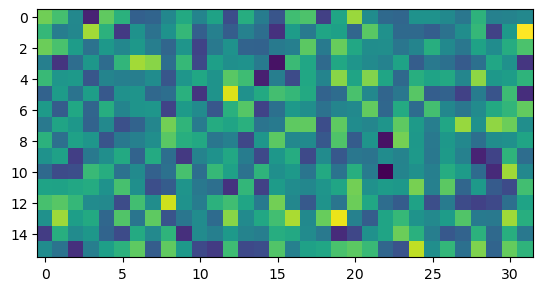

In [20]:
plt.imshow(x[0, 0])

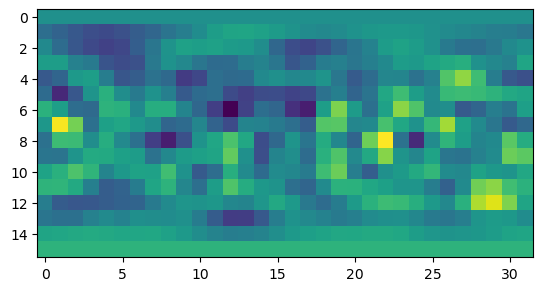

In [24]:
plt.imshow(y.detach()[0, 0])

In [110]:
# args = [4, 2, (16, 32), (16, 32), [2], 1, "equiangular",    "equiangular"]
N = 216
shape = (int(1.5 * N), int(2 * N))
print(shape)
conv = th.DiscreteContinuousConvS2(in_channels=1, out_channels=1, in_shape=shape, out_shape=shape, kernel_shape=[3]).to(device)

(324, 432)


In [111]:
x = torch.zeros(1, 1, *shape, device=device)
x[0, 0, 10:20, 216:226] = 10

In [112]:
x.shape

torch.Size([1, 1, 324, 432])

In [113]:
y = conv(x)

In [114]:
import matplotlib.pyplot as plt

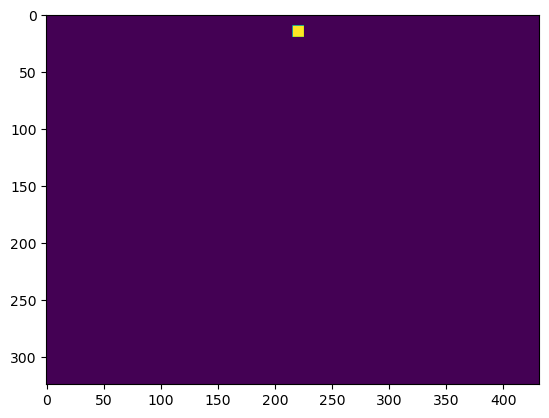

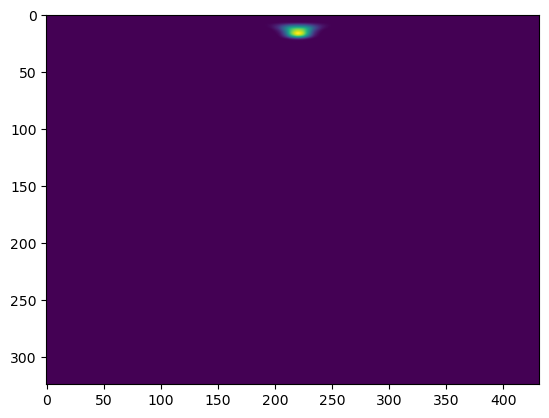

In [115]:
plt.imshow(x[0, 0])
plt.figure()
plt.imshow(y.detach()[0, 0])